<a href="https://colab.research.google.com/github/Adarshsinghparihar/Corona_detection_x-ray_Effat-University/blob/master/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/covid-19/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import cv2
from PIL import Image
from os import listdir
import skimage
from skimage.transform import resize
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [ ]:
def get_data(folder, X=[], y=[]):
 
  for folderName in listdir(folder)[:2]:
    # print(folderName) - used for debugging purposes
    if not folderName.startswith('.') and not folderName.endswith('.ipynb'): # to not consider .DS_Store and .ipynb files
      if folderName in ['normal']:
        label = 0
      elif folderName in ['corona']:
        label = 1
      # elif folderName in ['normal']:
        # label = 2 # for all other types of pnuemonia - label 2 is to be used later on
      # print(label) - used for debugging purposes
      for image_filename in tqdm(listdir(folder + folderName)):
        img_file = cv2.imread(folder + folderName + '/' + image_filename)
        if img_file is not None:
          img_file = skimage.transform.resize(img_file, (224, 224, 3))
          img_arr = np.asarray(img_file)
          X.append(img_arr)
          y.append(label)
  X = np.asarray(X)
  y = np.asarray(y)
  return X,y


In [ ]:
X,y = get_data(path)
print(len(X), len(y))


100%|██████████| 1595/1595 [08:19<00:00,  3.19it/s]


In [ ]:
y = to_categorical(y, num_classes=2)  
X_train, X_test, y_train, y_test = train_test_split(*shuffle(X, y), test_size=0.1, random_state=1234)

# Model 2 

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import warnings
warnings.filterwarnings("ignore")


In [ ]:

output_dim=10
batch_size = 128 
nb_epoch = 50
input_shape = (224, 224, 3)
#Initialize model
model = Sequential()

#CNN Layer 1
#this applies 64 convolution filters of size 3X3 each.
model.add(ZeroPadding2D((1,1), input_shape=input_shape))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))

#CNN Layer 2
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.5))

#Flatten the output before feeding these to the fully connected Neurons                                    
model.add(Flatten())

#Fully connected Layers
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

#Using adam as our optimzer
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

#Get a summary of the model.
print(model.summary())

#Compile the model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_3 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
dropout_5 (Dropout)          (None, 224, 224, 64)      0         
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 112, 112, 64)     

In [ ]:
# checkpoint_path = "training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

history= classifier.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.1,shuffle = True)

Train on 1523 samples, validate on 170 samples
Epoch 1/10
1523/1523 [==============================] - 3s 2ms/step - loss: 5.7671e-05 - accuracy: 1.0000 - val_loss: 0.2127 - val_accuracy: 0.9647
Epoch 2/10
1523/1523 [==============================] - 3s 2ms/step - loss: 5.0576e-05 - accuracy: 1.0000 - val_loss: 0.2100 - val_accuracy: 0.9647
Epoch 3/10
1523/1523 [==============================] - 3s 2ms/step - loss: 4.9548e-05 - accuracy: 1.0000 - val_loss: 0.2178 - val_accuracy: 0.9647
Epoch 4/10
1523/1523 [==============================] - 3s 2ms/step - loss: 4.1345e-05 - accuracy: 1.0000 - val_loss: 0.2154 - val_accuracy: 0.9647
Epoch 5/10
1523/1523 [==============================] - 3s 2ms/step - loss: 3.8455e-05 - accuracy: 1.0000 - val_loss: 0.2184 - val_accuracy: 0.9647
Epoch 6/10
1523/1523 [==============================] - 3s 2ms/step - loss: 3.5974e-05 - accuracy: 1.0000 - val_loss: 0.2231 - val_accuracy: 0.9647
Epoch 7/10
1523/1523 [==============================] - 3s 2ms/st

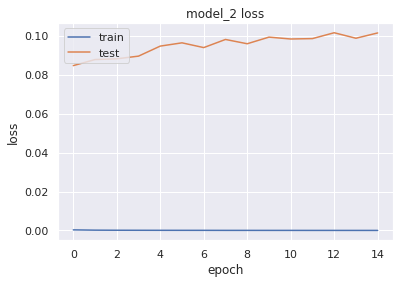

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

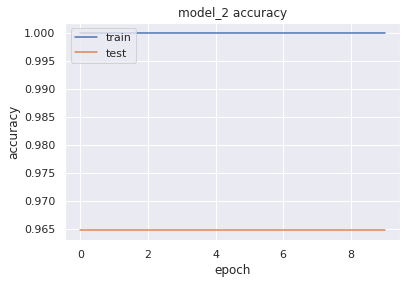

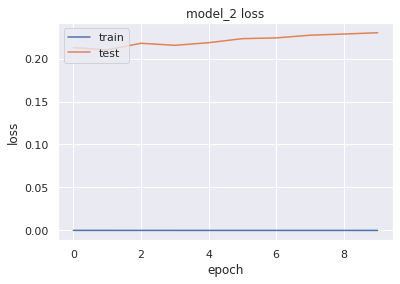

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import keras
y_pred_test = classifier.predict(X_test)
print('Score test: ', classifier.evaluate(X_test, y_test))


189/189 [==============================] - 0s 1ms/step
Score test:  [0.02837895607577622, 0.9867724776268005]


In [ ]:
BS= 32
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = classifier.predict(X_test)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
# print(classification_report(y_test.argmax(axis=1), predIdxs,
	# target_names=lb.classes_))

# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(y_test.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


[INFO] evaluating network...
[[158   2]
 [  0  29]]
acc: 0.9894
sensitivity: 0.9875
specificity: 1.0000


In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])

[5.7671154698049696e-05, 5.0576182994776584e-05, 4.954777139039835e-05, 4.1345014284093675e-05, 3.845501239463469e-05, 3.5973919803070734e-05, 3.134076829177583e-05, 2.9302359227934588e-05, 2.75537912255092e-05, 2.5300115319030138e-05]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
score_model = classifier.evaluate(x=X_test, y=y_test)

189/189 [==============================] - 0s 1ms/step


In [ ]:
met = list(zip(classifier.metrics_names, score_model))
print('Scores for test set:')
print('{}: {:.4f}'.format(met[0][0], met[0][1]))
print('{}: {:.4f}'.format(met[1][0], met[1][1]))

Scores for test set:
loss: 0.0284
accuracy: 0.9868


In [ ]:
print('Average scores for all epochs:')
print('accuracy: {:.4f} (+- {:.4f})'.format(np.mean(history.history['accuracy']), np.std(history.history['accuracy'])))
print('loss: {:.4f}'.format(np.mean(history.history['loss'])))

Average scores for all epochs:
accuracy: 1.0000 (+- 0.0000)
loss: 0.0000


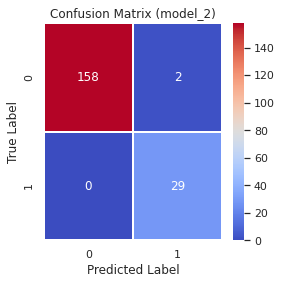

In [ ]:
y_pred_test = classifier.predict(X_test)
confmat = confusion_matrix(y_test.argmax(axis=1),y_pred_test.argmax(axis=1))

#Plot Confusion Matrix 
plt.figure(figsize=(4,4))
sns.heatmap(confmat, cmap='coolwarm', linecolor='white', linewidths=1, annot=True, fmt='d')
plt.title('Confusion Matrix (model_2)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
fig = plt.gcf()
fig.savefig('Confusion-Matrix-(model_2).png');
plt.show();

#Model 3


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

# Initialising the CNN
model_3_hidden= Sequential()

# Step 1 - Convolution
model_3_hidden.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))
# Adding a second convolutional layer
model_3_hidden.add(Conv2D(32, (3, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))
# Adding a third convolutional layer
model_3_hidden.add(Conv2D(32, (3, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))
# Step 3 - Flattening
model_3_hidden.add(Flatten())

# Step 4 - Full connection
model_3_hidden.add(Dense(units = 64, activation = 'relu'))
model_3_hidden.add(Dense(units = 2, activation = 'sigmoid'))

# Compiling the CNN
#optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model_3_hidden.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model_3_hidden.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 32)       

In [ ]:
import keras
keras.__version__

'2.3.1'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# BS = 32
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

# training_set = train_datagen.flow_from_directory('chest_xray/train',
#                                                  target_size = (64, 64),
#                                                  batch_size = 32,
#                                                  class_mode = 'binary')

# test_set = test_datagen.flow_from_directory('chest_xray/test',
#                                             target_size = (64, 64),
#                                             batch_size = 32,
#                                             class_mode = 'binary')

'''history=model_3_hidden.fit_generator((X_train,y_train),
                         steps_per_epoch = 100,
                         epochs = 25,
                         validation_data = X_test,y_test)
'''
history= model_3_hidden.fit(X_train, y_train, epochs=15, verbose=1, validation_split=0.1)

Train on 1608 samples, validate on 179 samples
Epoch 1/15
1608/1608 [==============================] - 91s 57ms/step - loss: 0.3535 - accuracy: 0.8700 - val_loss: 0.1144 - val_accuracy: 0.9804
Epoch 2/15
1608/1608 [==============================] - 91s 57ms/step - loss: 0.1171 - accuracy: 0.9590 - val_loss: 0.0597 - val_accuracy: 0.9860
Epoch 3/15
1608/1608 [==============================] - 91s 56ms/step - loss: 0.0801 - accuracy: 0.9729 - val_loss: 0.1157 - val_accuracy: 0.9777
Epoch 4/15
1608/1608 [==============================] - 91s 56ms/step - loss: 0.0793 - accuracy: 0.9695 - val_loss: 0.0474 - val_accuracy: 0.9888
Epoch 5/15
1608/1608 [==============================] - 91s 57ms/step - loss: 0.0554 - accuracy: 0.9826 - val_loss: 0.1213 - val_accuracy: 0.9693
Epoch 6/15
1608/1608 [==============================] - 92s 57ms/step - loss: 0.0536 - accuracy: 0.9801 - val_loss: 0.0493 - val_accuracy: 0.9832
Epoch 7/15
1608/1608 [==============================] - 90s 56ms/step - loss:

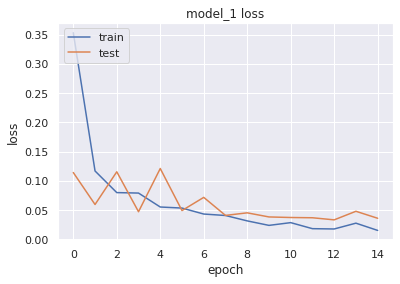

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

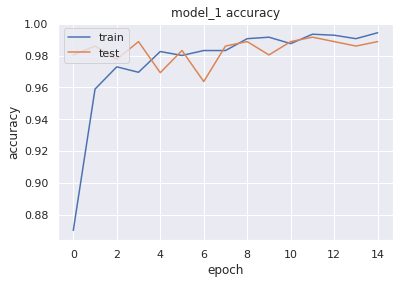

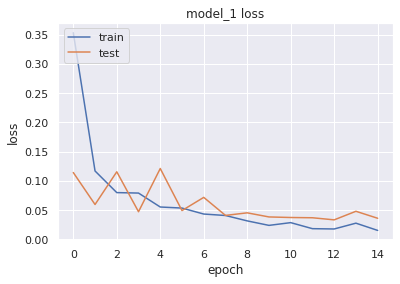

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
BS= 32
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model_3_hidden.predict(X_test, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
# print(classification_report(y_test.argmax(axis=1), predIdxs,
	# target_names=lb.classes_))

# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(y_test.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


[INFO] evaluating network...
[[77  0]
 [ 1 17]]
acc: 0.9895
sensitivity: 1.0000
specificity: 0.9444


In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.3535154417008903, 0.11706330073042888, 0.08005980817387946, 0.07926499484968719, 0.05542124406809905, 0.05359921419520432, 0.04338462598070465, 0.04089601196068344, 0.03167648041222374, 0.02398908548335086, 0.02868313650138426, 0.018367132316059687, 0.017839719900241188, 0.02777867007534951, 0.015374589918050406]
[0.87002486, 0.9589552, 0.9729478, 0.96952736, 0.98258704, 0.9800995, 0.98320895, 0.98320895, 0.99067163, 0.9916045, 0.9875622, 0.99347013, 0.9928483, 0.99067163, 0.994403]


In [ ]:
score_model = model_3_hidden.evaluate(x=X_test, y=y_test)

95/95 [==============================] - 1s 14ms/step


In [ ]:
met = list(zip(model_3_hidden.metrics_names, score_model))
print('Scores for test set:')
print('{}: {:.4f}'.format(met[0][0], met[0][1]))
print('{}: {:.4f}'.format(met[1][0], met[1][1]))

Scores for test set:
loss: 0.0356
accuracy: 0.9842


In [ ]:
print('Average scores for all epochs:')
print('accuracy: {:.4f} (+- {:.4f})'.format(np.mean(history.history['accuracy']), np.std(history.history['accuracy'])))
print('loss: {:.4f}'.format(np.mean(history.history['loss'])))

Average scores for all epochs:
accuracy: 0.9761 (+- 0.0300)
loss: 0.0658


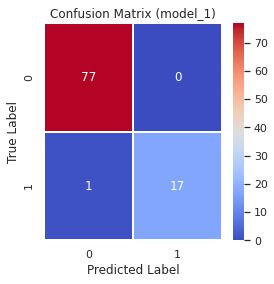

In [ ]:
y_pred_test = model_3_hidden.predict(X_test)
confmat = confusion_matrix(y_test.argmax(axis=1),y_pred_test.argmax(axis=1))

#Plot Confusion Matrix 
plt.figure(figsize=(4,4))
sns.heatmap(confmat, cmap='coolwarm', linecolor='white', linewidths=1, annot=True, fmt='d')
plt.title('Confusion Matrix (model_1)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
fig = plt.gcf()
fig.savefig('Confusion-Matrix-(model_1).png');
plt.show();